In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import binarize

# Assignment 4 - Classification

For this assignment, you'll need to perform a classification on a dataset, as well as do some prep work on the data. 

The exact steps of what you need to do are flexible and up to you to some degree, however you should consider some of the important things we've mentioned recently, such as:
<ul>
<li> Is the target balanced?
<li> Are there missing or erroneous values?
<li> Are there categorical or numerical features?
<li> Is there colinearity?
<li> Are there outliers?
<li> Should we normalize? 
<li> Do the distributions of the features give any indication that some may need work? 
</ul>

Basically, the data is in the original, potentially dirty, format, and you need to find what should be cleaned, and do the cleaning. There is not one "right" answer to what has to be done, and you'll probably need to do it with at least something of an iterative process - find an issue, correct it, check the data, repeat.

<b>The target that we are predicting is the loan_status. </b>

## Grading

The grades will be broken down as follows:
<ul>
<li> <b>30%</b> - a working predictive model with a reasonable level of accuracy. 
    <ul>
    <li> For the accuracy part, it will not be explicitly graded, but compared to all the others. If you're in the same general range, that's good - if yours is drastically less accurate (or, I guess more accurate), then I'll adjust. There won't be a comparison of "this person is 72.3% and this person is only 71.8% accurate, they fail."
    <li> This data is larger than most of the small sample sets, so random variations due to train-test splits shouldn't be too bad. (If you're a keener you could loop)
    <li> I will use the F1 score as the accuracy metric. 
    </ul>
<li> <b>40%</b> - a clear and readable description of what steps you took to prepare the data, and a brief not on the rationale behind it. Did you do a log transformation to a skewed feature, did you remove outliers, did you remove a feature that has a lot of missing values? Please put this somewhere obvious and readable, consider the goal of the assignment to explain your process to me. 
    <ul>
    <li> E.g. "The target data was imbalanced, so I tried several resampling methods and chose the one with the highest accuracy of the resulting model", "the feature X had the same value for 95% of records, so I dropped it". 
    <li> In this, please also state if you see a group that appears to be a good credit risk, and a group that is a bad credit risk, and indicate the evidence showing that. Please do this other than the most simplistic way - more money = better credit. If there are no such groups, state why you think this. This will likely be about 3 - 5 statements or points, you should provide evidence from the data, but it does not need to be an essay. (You may want to consider this question after you're pretty much done with the data prep and modelling.)
    </ul>
<li> <b>30%</b> - allowing your model to be "deployed". At the bottom of this file there is a small block of code to load in some test data (that I have), and calculate your accuracy. Your contribution to this part is to have a model that is ready to make predictions. Some specifics to consider:
    <ul>
    <li> The test data will be in exactly the same format as the dataset you're given. So any steps that you took to prepare your data for modelling will need to be mirroed here, so the new  data can be predicted. The easiest way to do this is to use a pipeline, but it is up to you. Remember the model only accepts data that is in a certain format - the one that you had the data in when it was trained, so when making predictions you need to make sure that is true. 
    <li> Since I'm providing test data, and your task is to just create a model, think about how that might impact your train-test splitting, both as you're developing and for the final product. 
    <li> Once the model is trained it should predict any data that is in the right format, so I should be able to provide any proper dataset, click run on that testing cell, and get predictions. I will not be doing anything that will purposefully make this harder or trickier, like including data that has errors or is in the wrong format, I just split the entire set of data, reserved part of it to test accuracy, and gave the rest to you. Things that you've changed (e.g. dropping a column, one-hot encoding) do need to be replicated at some point before the model can accept the new data to predict. In general we <b>do</b> want to check in our processing that our input is valid, this is kind of a junior introduction to that. 
    </ul>
</ul

## Load Credit Data

In [4]:
df = pd.read_csv("train.csv")
df.head()

Unnamed: 0  person_age  person_income person_home_ownership  \
0       26967          27         120000              MORTGAGE   
1        8449          24          58000              MORTGAGE   
2       20983          30          45000                  RENT   
3       19612          35          35000              MORTGAGE   
4       30371          38          55000                  RENT   

   person_emp_length        loan_intent loan_grade  loan_amnt  loan_int_rate  \
0                3.0           PERSONAL          B      14000          11.99   
1                8.0  DEBTCONSOLIDATION          A      15700           7.90   
2               11.0            MEDICAL          C       5000          12.73   
3                5.0          EDUCATION          B       5600          11.49   
4                0.0          EDUCATION          C       6500          11.03   

   loan_status  loan_percent_income cb_person_default_on_file  \
0            0                 0.12                         N   
1            0                 0.27                         N   
2            1                 0.11                         Y   
3            0                 0.16                         N   
4            0                 0.12                         Y   

   cb_person_cred_hist_length  
0                          10  
1                           3  
2                           8  
3                           6  
4                          12

### Accuracy Test

Replace the green part with whatever you need to transform the fresh data into the format needed for your model to predict. 

<b>Note:</b> you could test and make sure that things are working OK here by taking part of your dataset, saving it in a separate CSV, and running it through here as a piece of test data. The accuracy results would be useless, but you'd confirm that the model works properly. 

In [5]:
df.describe(include="all").T

count unique        top   freq          mean  \
Unnamed: 0                  26064.0    NaN        NaN    NaN  16307.473258   
person_age                  26064.0    NaN        NaN    NaN     27.738375   
person_income               26064.0    NaN        NaN    NaN  66027.949893   
person_home_ownership         26064      4       RENT  13118           NaN   
person_emp_length           25350.0    NaN        NaN    NaN       4.79144   
loan_intent                   26064      6  EDUCATION   5119           NaN   
loan_grade                    26064      7          A   8627           NaN   
loan_amnt                   26064.0    NaN        NaN    NaN   9595.886088   
loan_int_rate               23575.0    NaN        NaN    NaN     11.006839   
loan_status                 26064.0    NaN        NaN    NaN      0.216812   
loan_percent_income         26064.0    NaN        NaN    NaN      0.170264   
cb_person_default_on_file     26064      2          N  21425           NaN   
cb_person_cred_hist_length  26064.0    NaN        NaN    NaN       5.80521   

                                     std     min       25%      50%       75%  \
Unnamed: 0                   9396.129345     0.0   8202.25  16324.5  24458.25   
person_age                      6.381305    20.0      23.0     26.0      30.0   
person_income               62650.976785  4080.0  38793.75  55000.0   79200.0   
person_home_ownership                NaN     NaN       NaN      NaN       NaN   
person_emp_length               4.100277     0.0       2.0      4.0       7.0   
loan_intent                          NaN     NaN       NaN      NaN       NaN   
loan_grade                           NaN     NaN       NaN      NaN       NaN   
loan_amnt                     6321.89458   500.0    5000.0   8000.0   12200.0   
loan_int_rate                   3.245217    5.42       7.9    10.99     13.47   
loan_status                     0.412082     0.0       0.0      0.0       0.0   
loan_percent_income             0.106673     0.0      0.09     0.15      0.23   
cb_person_default_on_file            NaN     NaN       NaN      NaN       NaN   
cb_person_cred_hist_length      4.055158     2.0       3.0      4.0       8.0   

                                  max  
Unnamed: 0                    32580.0  
person_age                      144.0  
person_income               6000000.0  
person_home_ownership             NaN  
person_emp_length               123.0  
loan_intent                       NaN  
loan_grade                        NaN  
loan_amnt                     35000.0  
loan_int_rate                   23.22  
loan_status                       1.0  
loan_percent_income              0.83  
cb_person_default_on_file         NaN  
cb_person_cred_hist_length       30.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26064 non-null  int64  
 1   person_age                  26064 non-null  int64  
 2   person_income               26064 non-null  int64  
 3   person_home_ownership       26064 non-null  object 
 4   person_emp_length           25350 non-null  float64
 5   loan_intent                 26064 non-null  object 
 6   loan_grade                  26064 non-null  object 
 7   loan_amnt                   26064 non-null  int64  
 8   loan_int_rate               23575 non-null  float64
 9   loan_status                 26064 non-null  int64  
 10  loan_percent_income         26064 non-null  float64
 11  cb_person_default_on_file   26064 non-null  object 
 12  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(6), object

In [8]:
df2 = df.dropna()
df2.describe(include="all").T

count unique        top   freq          mean  \
Unnamed: 0                  22919.0    NaN        NaN    NaN  16319.255378   
person_age                  22919.0    NaN        NaN    NaN      27.73354   
person_income               22919.0    NaN        NaN    NaN  66688.132336   
person_home_ownership         22919      4       RENT  11590           NaN   
person_emp_length           22919.0    NaN        NaN    NaN      4.795934   
loan_intent                   22919      6  EDUCATION   4524           NaN   
loan_grade                    22919      7          A   7534           NaN   
loan_amnt                   22919.0    NaN        NaN    NaN   9670.580086   
loan_int_rate               22919.0    NaN        NaN    NaN     11.035697   
loan_status                 22919.0    NaN        NaN    NaN      0.215803   
loan_percent_income         22919.0    NaN        NaN    NaN      0.169662   
cb_person_default_on_file     22919      2          N  18790           NaN   
cb_person_cred_hist_length  22919.0    NaN        NaN    NaN      5.796413   

                                     std     min      25%      50%      75%  \
Unnamed: 0                   9372.236618     0.0   8227.0  16329.0  24465.5   
person_age                      6.335769    20.0     23.0     26.0     30.0   
person_income               64062.044451  4080.0  39600.0  55782.0  80000.0   
person_home_ownership                NaN     NaN      NaN      NaN      NaN   
person_emp_length               4.108956     0.0      2.0      4.0      7.0   
loan_intent                          NaN     NaN      NaN      NaN      NaN   
loan_grade                           NaN     NaN      NaN      NaN      NaN   
loan_amnt                    6329.359254   500.0   5000.0   8000.0  12500.0   
loan_int_rate                   3.234413    5.42      7.9    10.99    13.48   
loan_status                     0.411388     0.0      0.0      0.0      0.0   
loan_percent_income             0.106406     0.0     0.09     0.15     0.23   
cb_person_default_on_file            NaN     NaN      NaN      NaN      NaN   
cb_person_cred_hist_length      4.035816     2.0      3.0      4.0      8.0   

                                  max  
Unnamed: 0                    32580.0  
person_age                      144.0  
person_income               6000000.0  
person_home_ownership             NaN  
person_emp_length               123.0  
loan_intent                       NaN  
loan_grade                        NaN  
loan_amnt                     35000.0  
loan_int_rate                   23.22  
loan_status                       1.0  
loan_percent_income              0.83  
cb_person_default_on_file         NaN  
cb_person_cred_hist_length       30.0

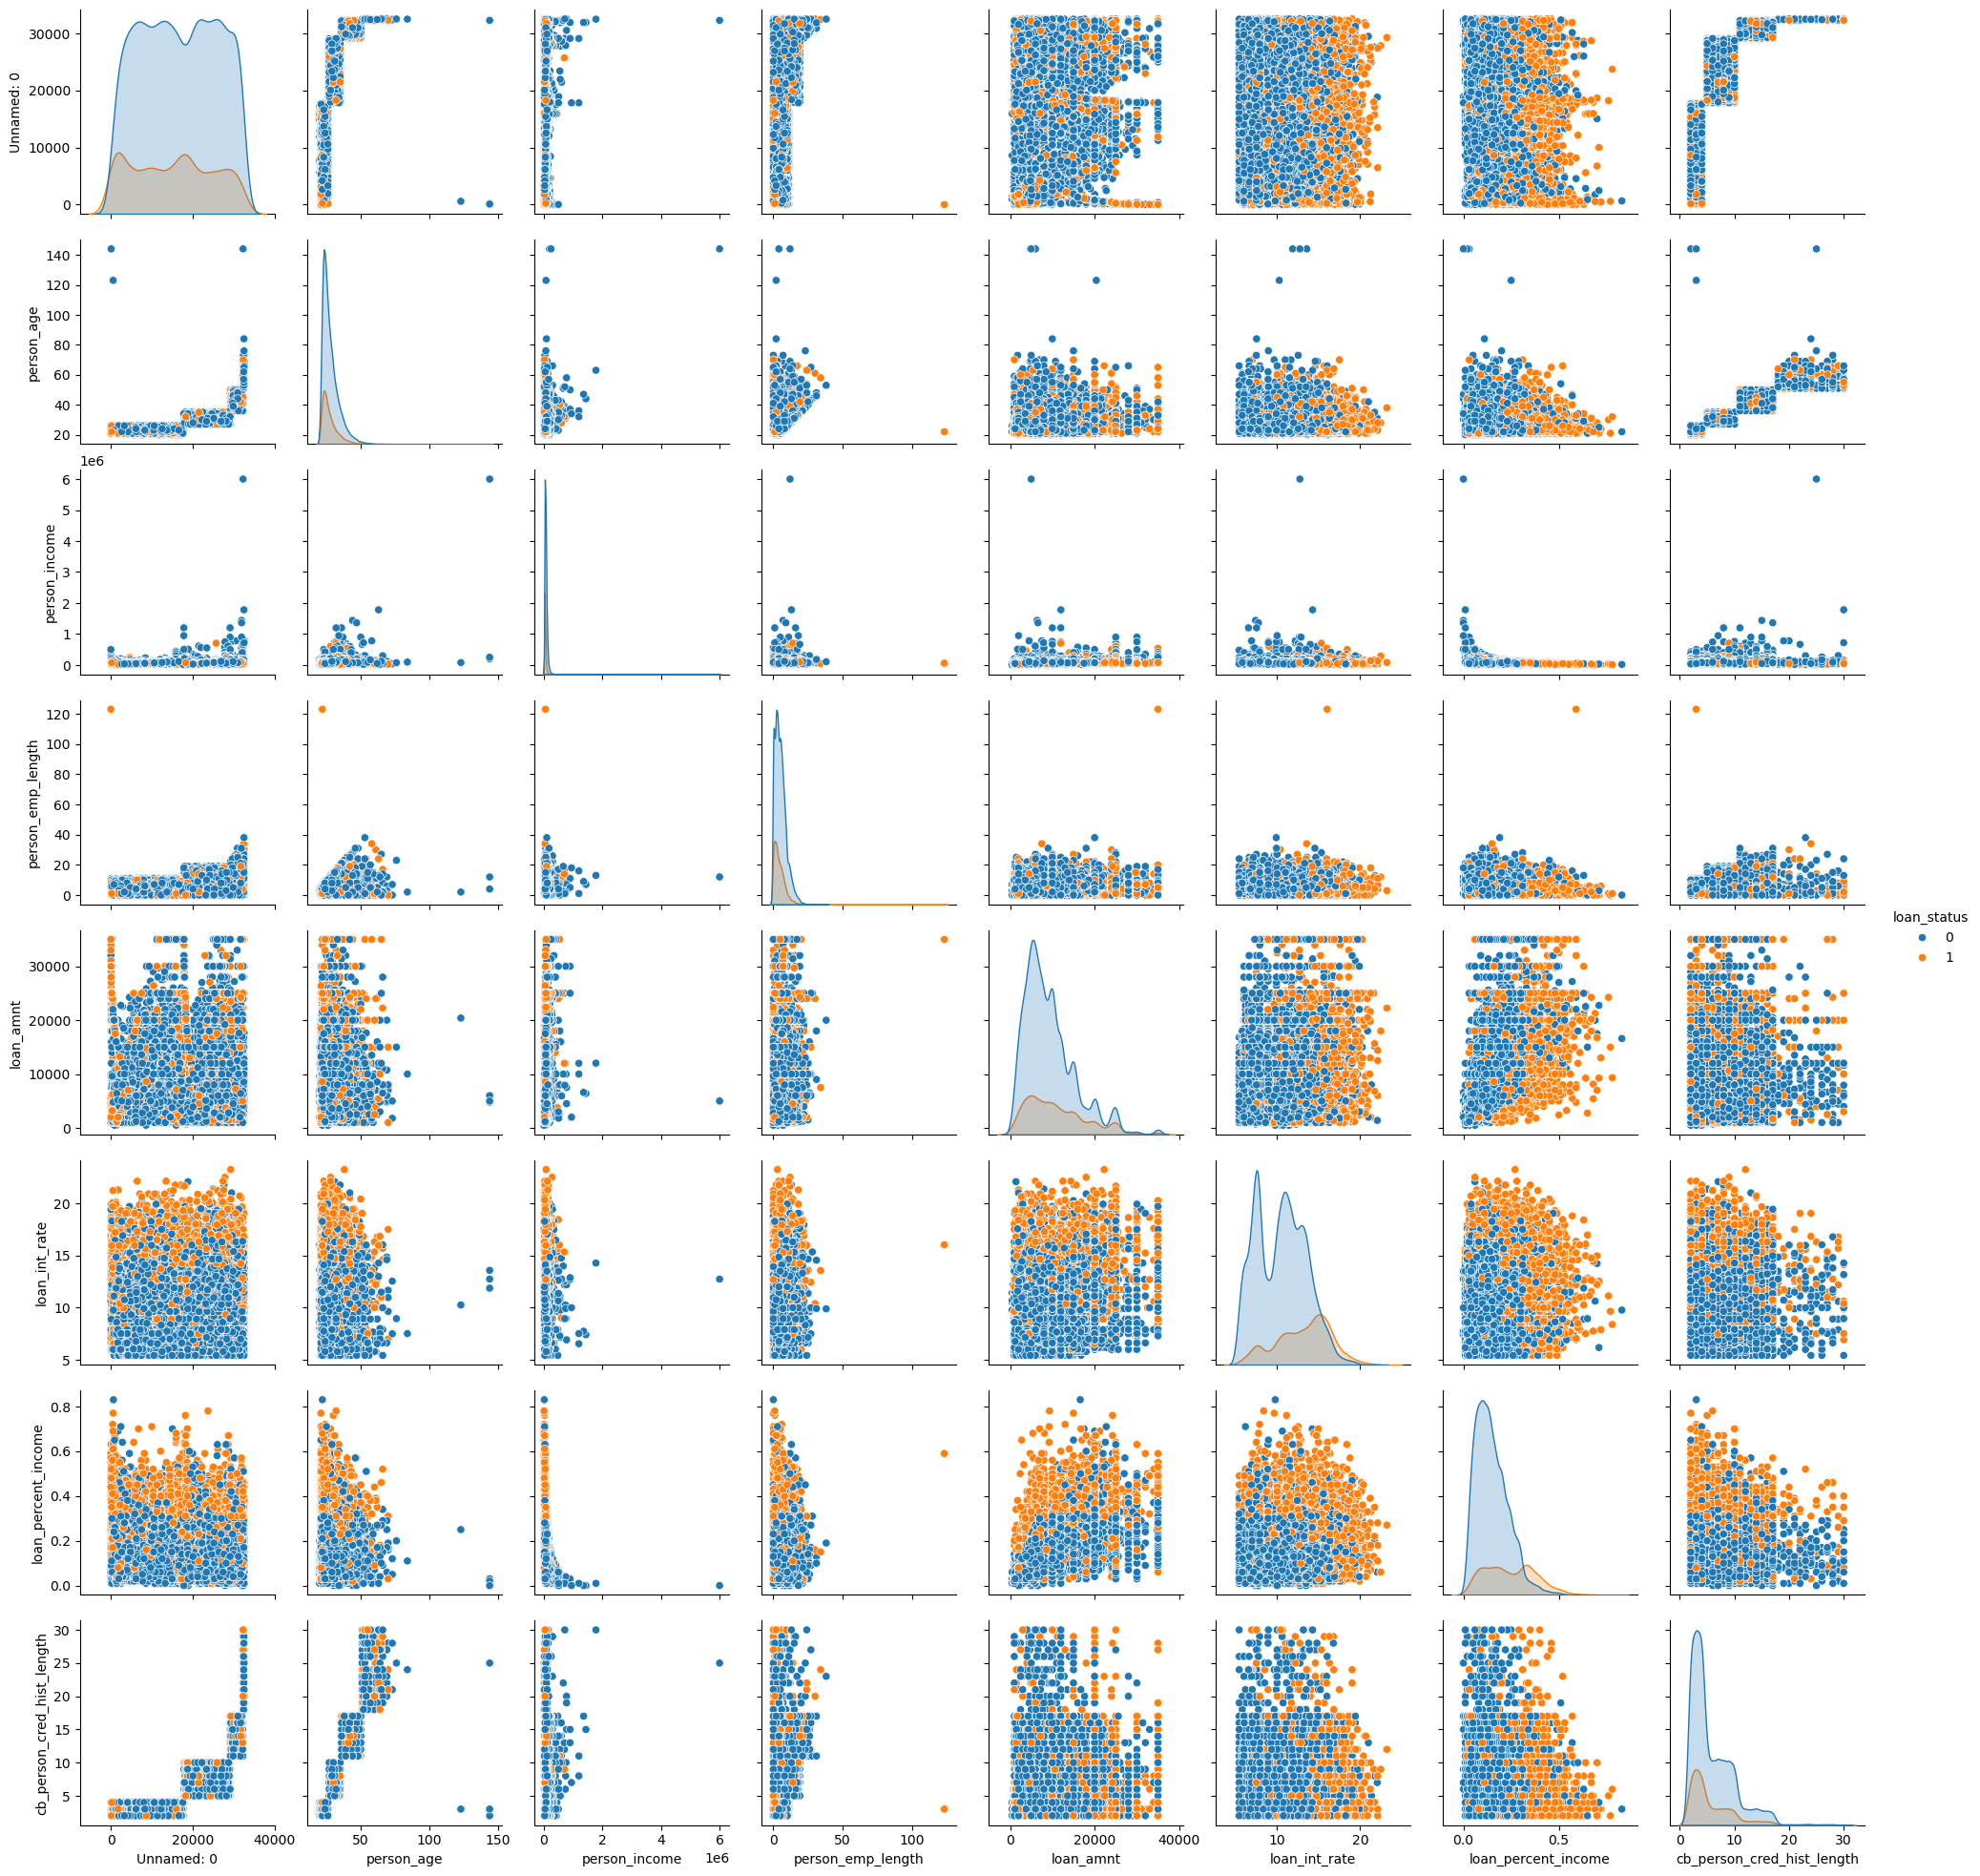

In [9]:
sns.pairplot(df2, hue="loan_status")

In [10]:
df2 = df2[df2["person_age"]<100]
df2 = df2[df2["person_income"]<1000000]
df2 = df2[df2["person_emp_length"]<100]

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

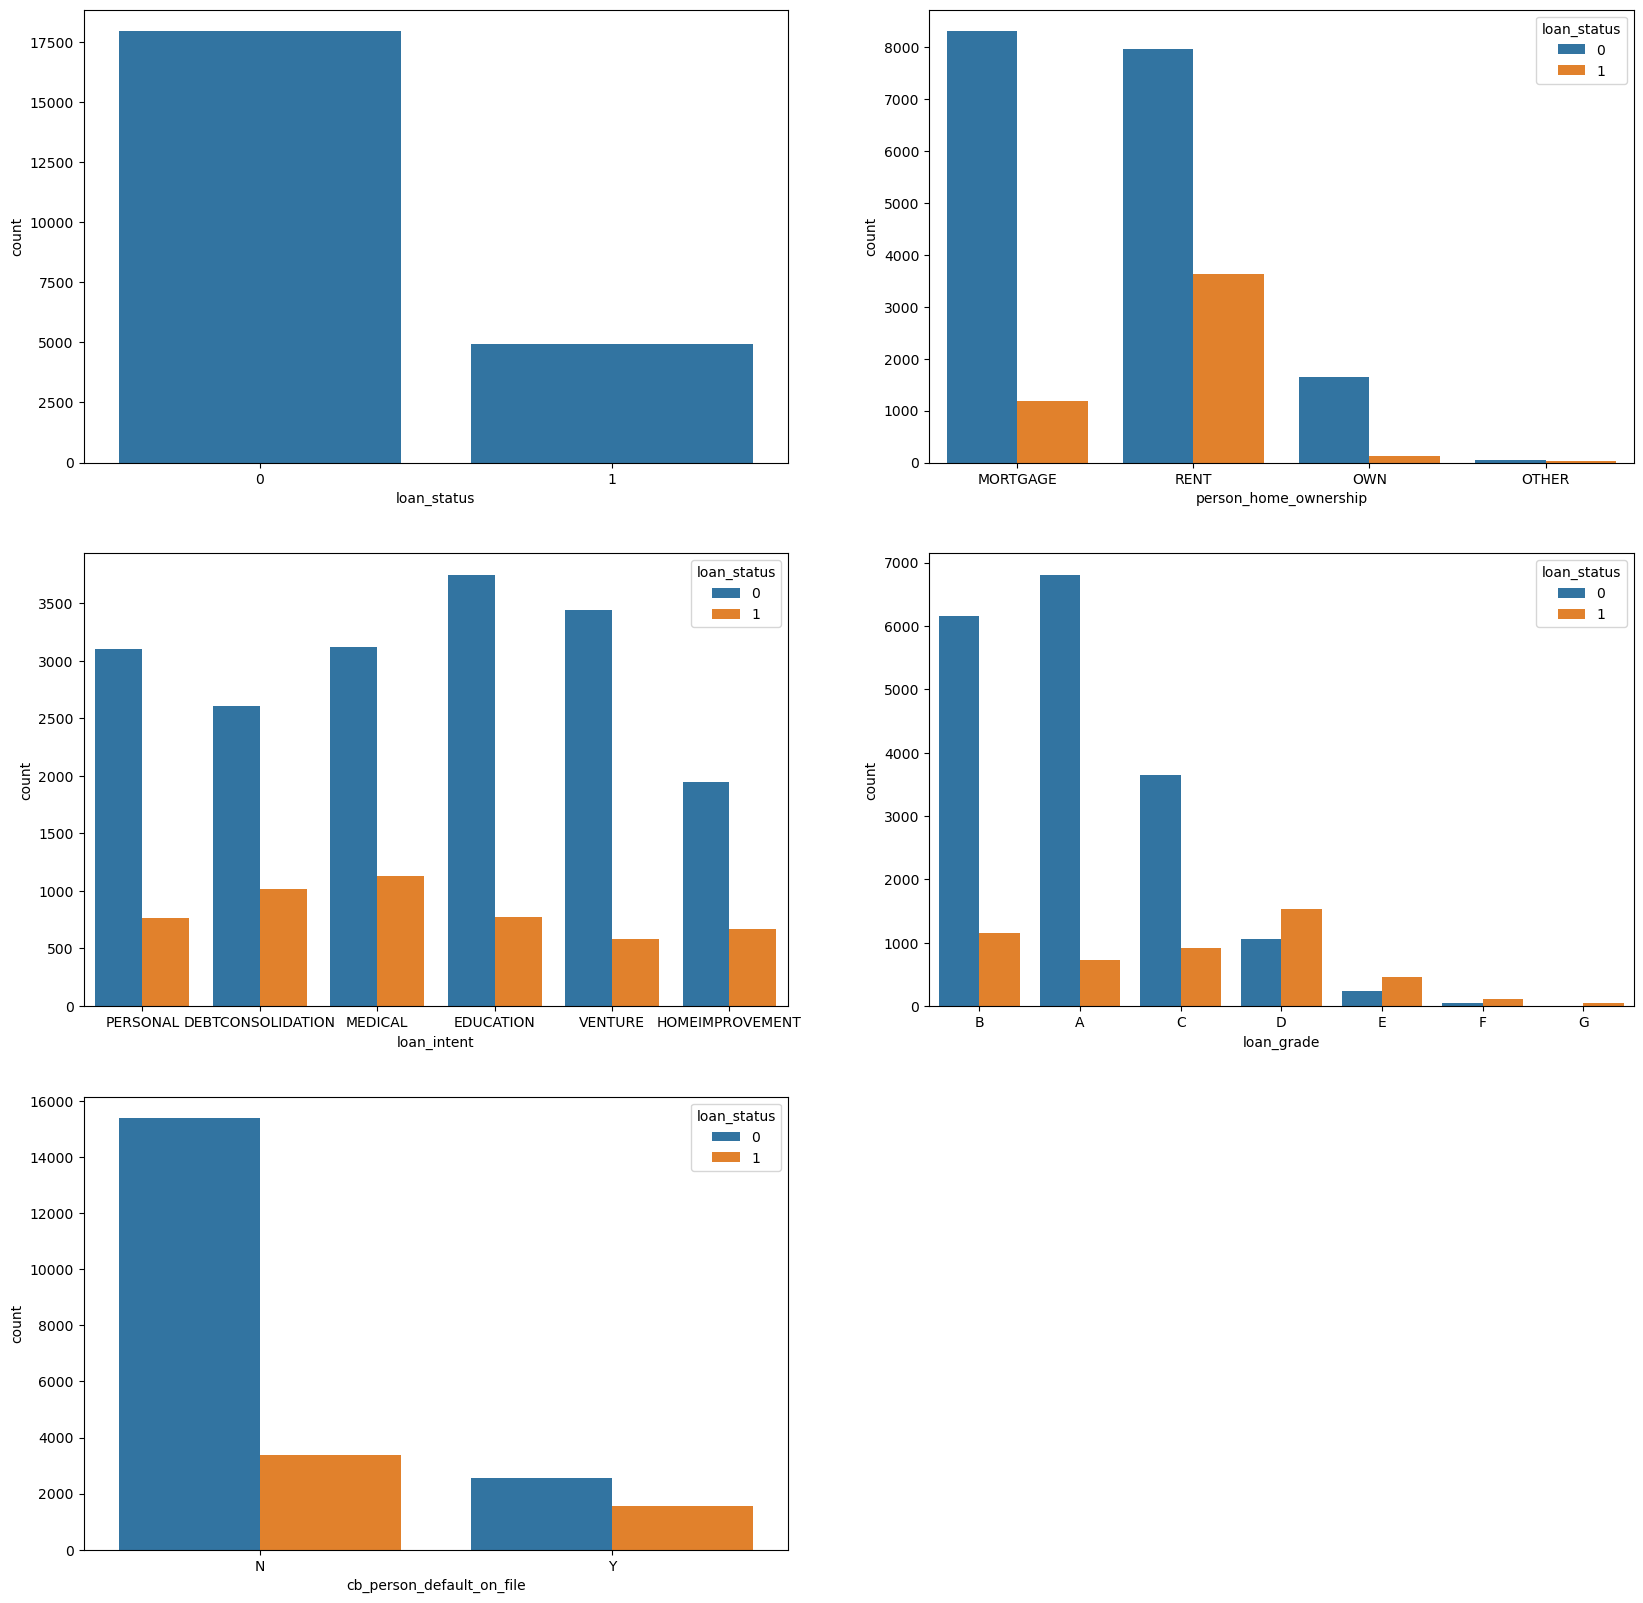

In [13]:
plt.figure(figsize=(20, 20))
thinkplot.PrePlot(6,3,2)
sns.countplot(data=df2, x="loan_status")
thinkplot.SubPlot(2)
sns.countplot(data=df2, x="person_home_ownership", hue="loan_status")
thinkplot.SubPlot(3)
sns.countplot(data=df2, x="loan_intent", hue="loan_status")
thinkplot.SubPlot(4)
sns.countplot(data=df2, x="loan_grade", hue="loan_status")
thinkplot.SubPlot(5)
sns.countplot(data=df2, x="cb_person_default_on_file", hue="loan_status")

In [14]:
df2["grade_2"] = df2["loan_grade"].isin(["A", "B", "C"])
df2.sample(5)

Unnamed: 0  person_age  person_income person_home_ownership  \
3362        10231          26          58000                  RENT   
2453        12160          22          42500                  RENT   
24453       11147          25          50000                  RENT   
4446         5129          23          60000                  RENT   
11037       13723          24          95004              MORTGAGE   

       person_emp_length loan_intent loan_grade  loan_amnt  loan_int_rate  \
3362                10.0   EDUCATION          C       9600          13.99   
2453                 7.0     MEDICAL          D      11850          14.11   
24453                6.0   EDUCATION          A      10000           7.49   
4446                 2.0     MEDICAL          A       9000           6.17   
11037                0.0     MEDICAL          C      18000          13.35   

       loan_status  loan_percent_income cb_person_default_on_file  \
3362             0                 0.17                         Y   
2453             1                 0.28                         Y   
24453            0                 0.20                         N   
4446             0                 0.15                         N   
11037            0                 0.19                         N   

       cb_person_cred_hist_length  grade_2  
3362                            4     True  
2453                            2    False  
24453                           3     True  
4446                            2     True  
11037                           3     True

In [15]:
df2.drop(columns={"loan_grade"}, inplace=True)

In [16]:
df2.describe(include="all").T

count unique        top   freq          mean  \
Unnamed: 0                  22909.0    NaN        NaN    NaN  16318.677507   
person_age                  22909.0    NaN        NaN    NaN     27.710769   
person_income               22909.0    NaN        NaN    NaN  66124.767602   
person_home_ownership         22909      4       RENT  11586           NaN   
person_emp_length           22909.0    NaN        NaN    NaN       4.78969   
loan_intent                   22909      6  EDUCATION   4521           NaN   
loan_amnt                   22909.0    NaN        NaN    NaN   9669.640753   
loan_int_rate               22909.0    NaN        NaN    NaN     11.035804   
loan_status                 22909.0    NaN        NaN    NaN      0.215854   
loan_percent_income         22909.0    NaN        NaN    NaN      0.169696   
cb_person_default_on_file     22909      2          N  18781           NaN   
cb_person_cred_hist_length  22909.0    NaN        NaN    NaN      5.793836   
grade_2                       22909      2       True  19400           NaN   

                                     std     min      25%      50%      75%  \
Unnamed: 0                   9369.138831     1.0   8229.0  16328.0  24462.0   
person_age                      6.156724    20.0     23.0     26.0     30.0   
person_income               46586.016992  4080.0  39600.0  55692.0  80000.0   
person_home_ownership                NaN     NaN      NaN      NaN      NaN   
person_emp_length                4.03339     0.0      2.0      4.0      7.0   
loan_intent                          NaN     NaN      NaN      NaN      NaN   
loan_amnt                    6327.819938   500.0   5000.0   8000.0  12500.0   
loan_int_rate                   3.234427    5.42      7.9    10.99    13.48   
loan_status                     0.411422     0.0      0.0      0.0      0.0   
loan_percent_income             0.106349     0.0     0.09     0.15     0.23   
cb_person_default_on_file            NaN     NaN      NaN      NaN      NaN   
cb_person_cred_hist_length      4.030015     2.0      3.0      4.0      8.0   
grade_2                              NaN     NaN      NaN      NaN      NaN   

                                 max  
Unnamed: 0                   32580.0  
person_age                      84.0  
person_income               948000.0  
person_home_ownership            NaN  
person_emp_length               38.0  
loan_intent                      NaN  
loan_amnt                    35000.0  
loan_int_rate                  23.22  
loan_status                      1.0  
loan_percent_income             0.83  
cb_person_default_on_file        NaN  
cb_person_cred_hist_length      30.0  
grade_2                          NaN

<Axes: xlabel='person_income', ylabel='Density'>

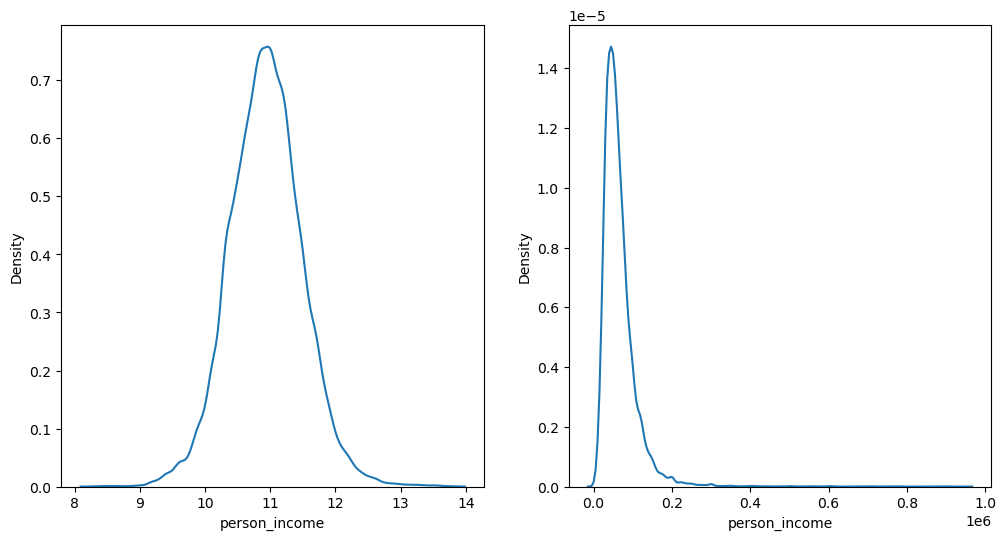

In [17]:
thinkplot.PrePlot(2,1,2)
sns.kdeplot(x=np.log(df2.person_income))
thinkplot.SubPlot(2)
sns.kdeplot(x=df2.person_income)

In [18]:
df3 = df2.copy()

toTrans = ["person_income", "person_age", "loan_amnt", "loan_int_rate"]
for c in [c for c in df3.columns if df3[c].name in toTrans]:
    df3[c] = np.log(df3[c])

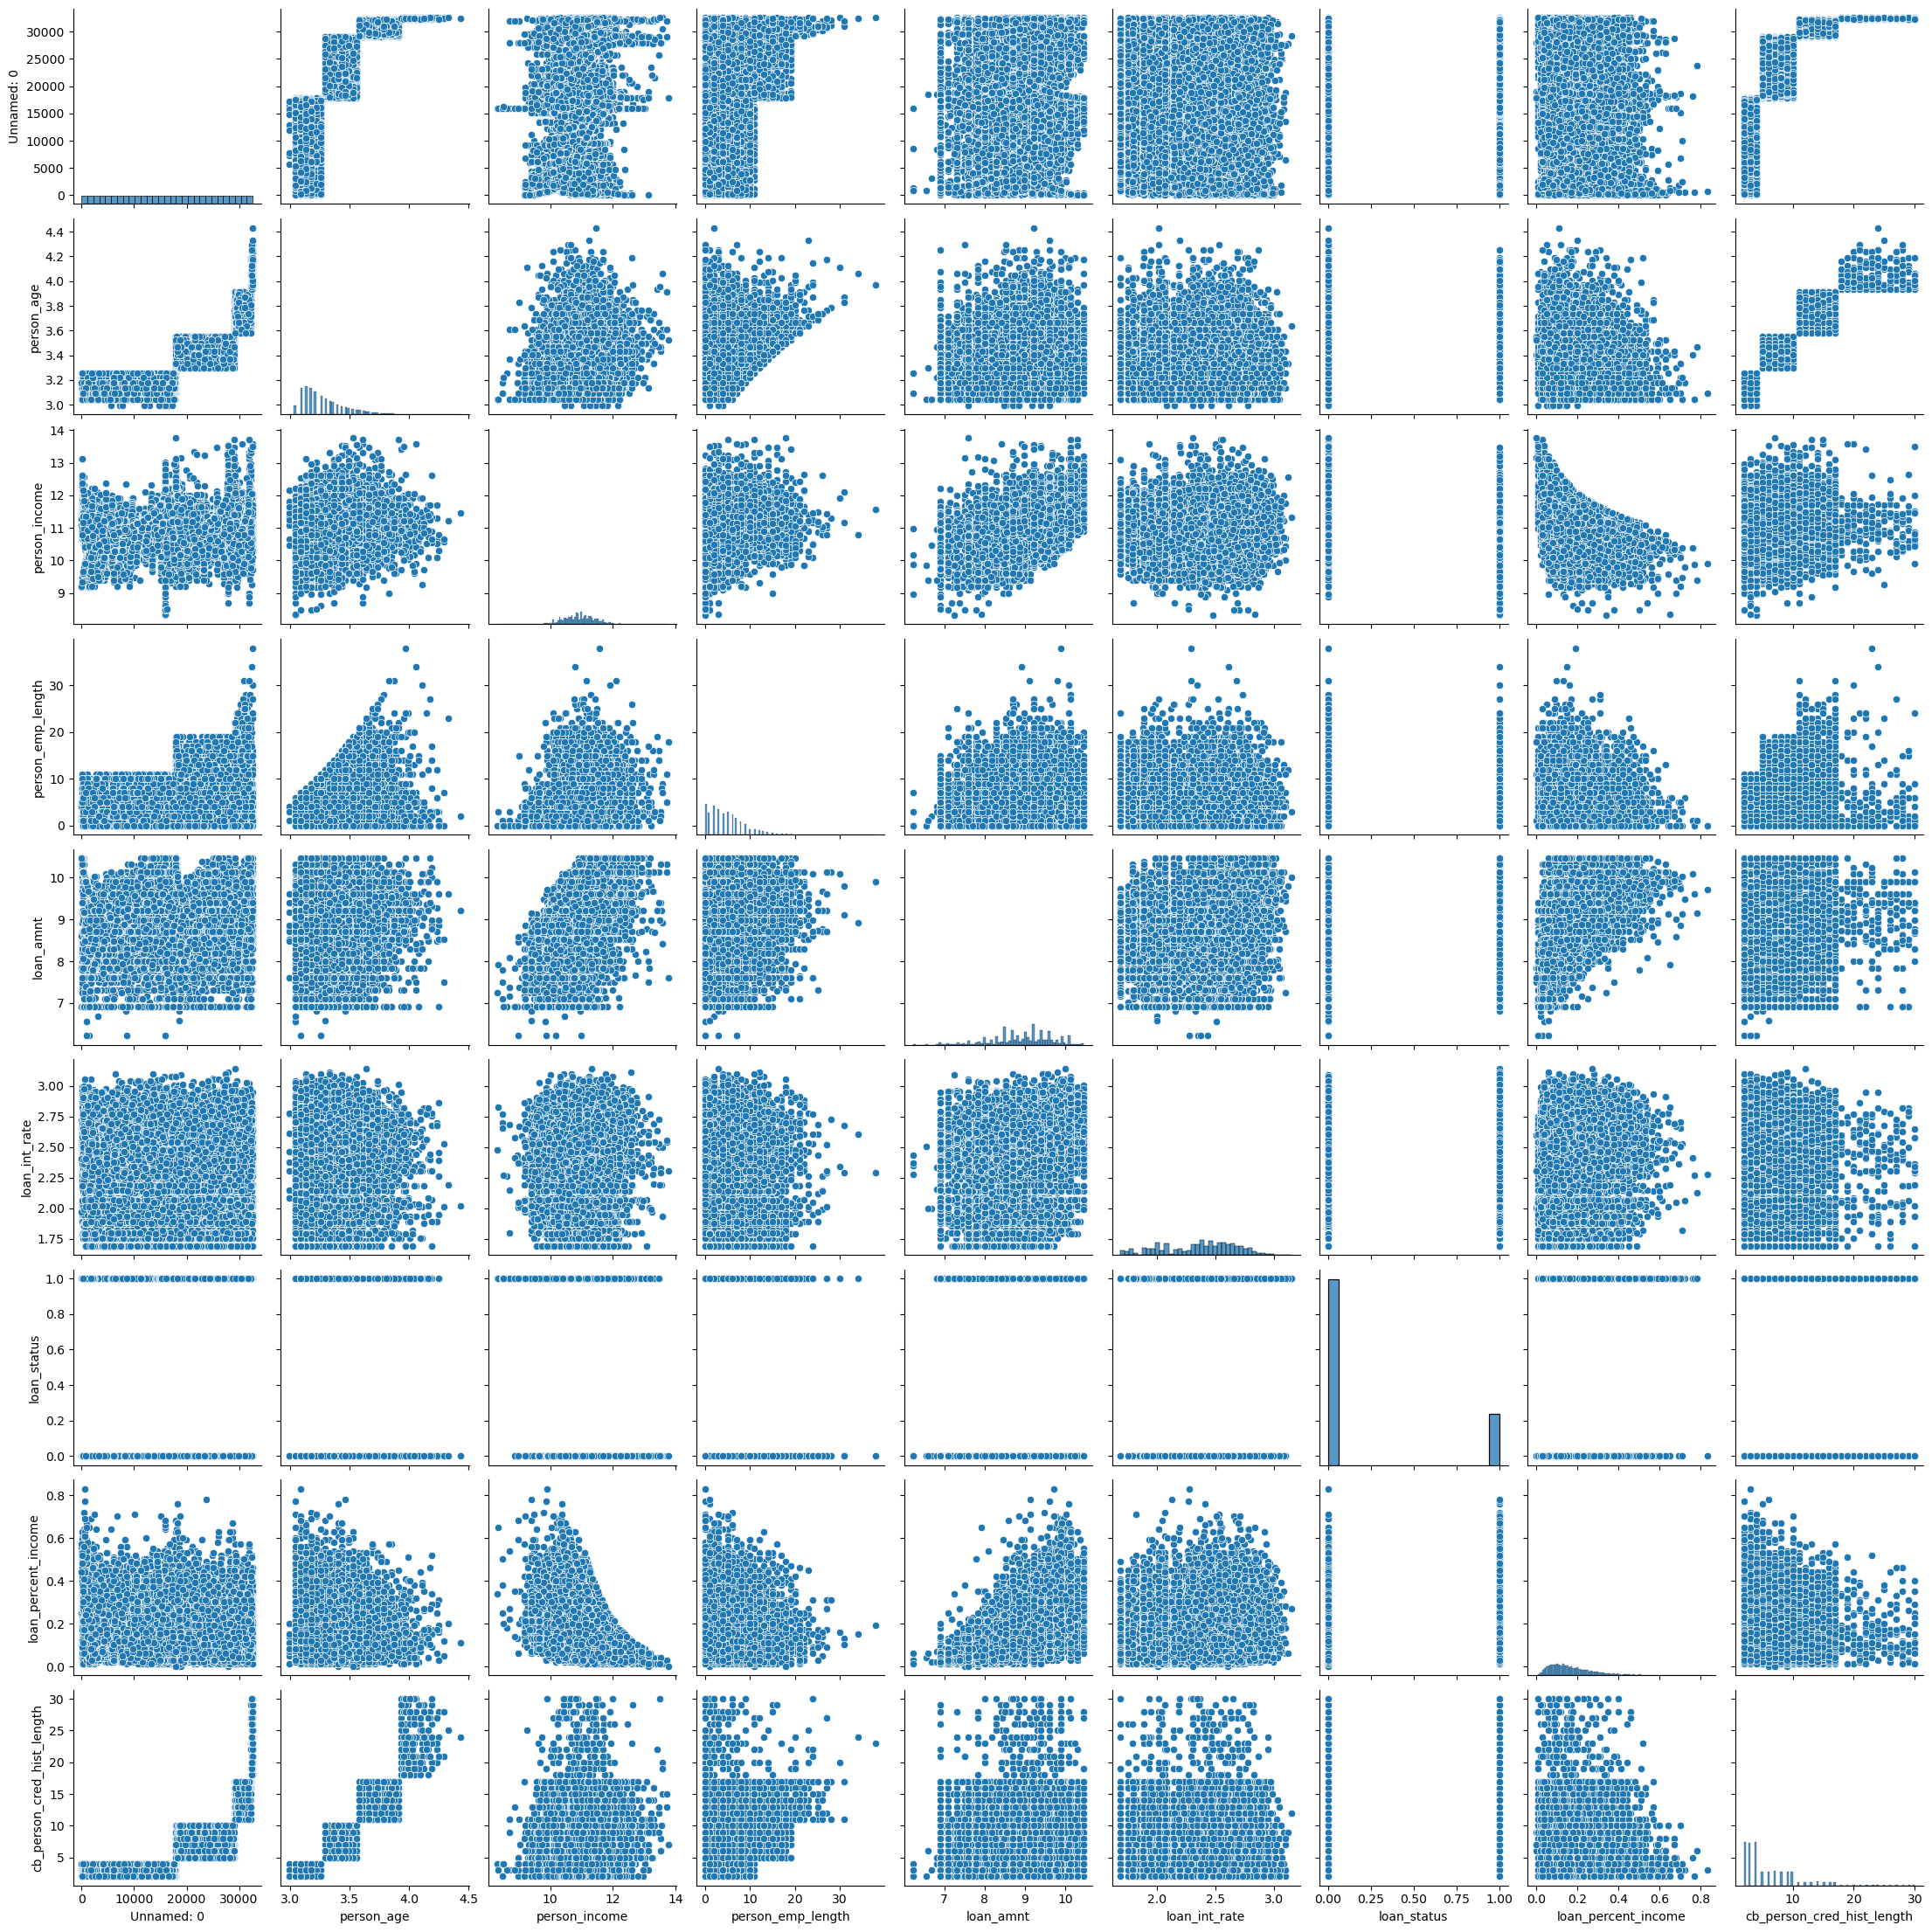

In [19]:
sns.pairplot(df3.drop(columns={"grade_2"}))

In [20]:
df3d = pd.get_dummies(df3, drop_first=True)
df3d.head()

Unnamed: 0  person_age  person_income  person_emp_length  loan_amnt  \
0       26967    3.295837      11.695247                3.0   9.546813   
1        8449    3.178054      10.968198                8.0   9.661416   
2       20983    3.401197      10.714418               11.0   8.517193   
3       19612    3.555348      10.463103                5.0   8.630522   
4       30371    3.637586      10.915088                0.0   8.779557   

   loan_int_rate  loan_status  loan_percent_income  \
0       2.484073            0                 0.12   
1       2.066863            0                 0.27   
2       2.543961            1                 0.11   
3       2.441477            0                 0.16   
4       2.400619            0                 0.12   

   cb_person_cred_hist_length  grade_2  person_home_ownership_OTHER  \
0                          10     True                        False   
1                           3     True                        False   
2                           8     True                        False   
3                           6     True                        False   
4                          12     True                        False   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                      False                       False   
1                      False                       False   
2                      False                        True   
3                      False                       False   
4                      False                        True   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                  False                        False                False   
1                  False                        False                False   
2                  False                        False                 True   
3                   True                        False                False   
4                   True                        False                False   

   loan_intent_PERSONAL  loan_intent_VENTURE  cb_person_default_on_file_Y  
0                  True                False                        False  
1                 False                False                        False  
2                 False                False                         True  
3                 False                False                        False  
4                 False                False                         True

In [21]:
df3d["grade_2"] = df3d["grade_2"].astype("uint8")
#df3d.info()
df3d.head()

Unnamed: 0  person_age  person_income  person_emp_length  loan_amnt  \
0       26967    3.295837      11.695247                3.0   9.546813   
1        8449    3.178054      10.968198                8.0   9.661416   
2       20983    3.401197      10.714418               11.0   8.517193   
3       19612    3.555348      10.463103                5.0   8.630522   
4       30371    3.637586      10.915088                0.0   8.779557   

   loan_int_rate  loan_status  loan_percent_income  \
0       2.484073            0                 0.12   
1       2.066863            0                 0.27   
2       2.543961            1                 0.11   
3       2.441477            0                 0.16   
4       2.400619            0                 0.12   

   cb_person_cred_hist_length  grade_2  person_home_ownership_OTHER  \
0                          10        1                        False   
1                           3        1                        False   
2                           8        1                        False   
3                           6        1                        False   
4                          12        1                        False   

   person_home_ownership_OWN  person_home_ownership_RENT  \
0                      False                       False   
1                      False                       False   
2                      False                        True   
3                      False                       False   
4                      False                        True   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                  False                        False                False   
1                  False                        False                False   
2                  False                        False                 True   
3                   True                        False                False   
4                   True                        False                False   

   loan_intent_PERSONAL  loan_intent_VENTURE  cb_person_default_on_file_Y  
0                  True                False                        False  
1                 False                False                        False  
2                 False                False                         True  
3                 False                False                        False  
4                 False                False                         True

In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter
sampler = SMOTE()
y1 = np.array(df3d["loan_status"]).reshape(-1,1)
df3d.drop(columns={"loan_status"}, inplace=True)
x1 = np.array(df3d)

X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.33)
X_train_, y_train_ = sampler.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_))

Resampled dataset shape Counter({np.int64(0): 12064, np.int64(1): 12064})


In [23]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_)
X_test_norm = scaler.transform(X_test)

In [24]:
model = LogisticRegression().fit(X_train_norm, y_train_.ravel())
predictions = model.predict(X_test_norm)
predictions = predictions.reshape(-1,1)
labels = binarize(predictions)

F1: 0.6683897647971052
Acc: 0.8302910052910053


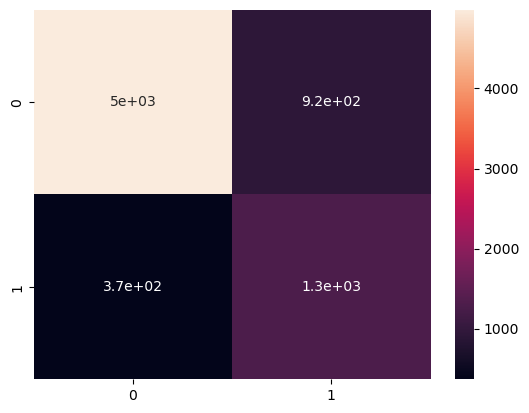

In [25]:
conf_matrix = confusion_matrix(y_test,labels)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test, labels))
print("Acc:",accuracy_score(y_test, labels))

F1: 0.19633093157545098


c:\Users\Maitreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<Axes: >

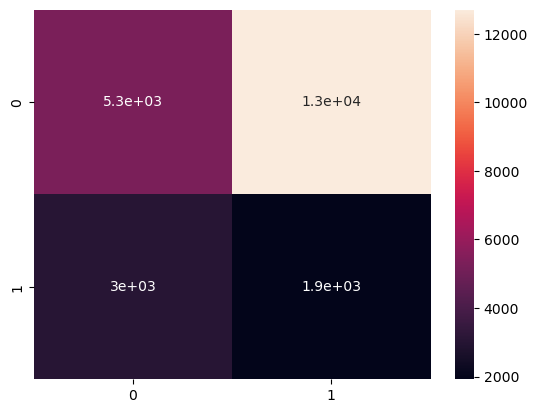

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import binarize
# Add any other imports you used for preprocessing (e.g., StandardScaler, MinMaxScaler)

d_test = pd.read_csv("train.csv")

######################
# Insert whatever you need to do to prep the data here.
#######################

# 1. FIX THE KEYERROR: Target column is 'loan_status' (derived from your notebook)
target_column = 'loan_status'

# 2. Handle missing values by dropping rows (as done in your notebook: df.dropna())
d_test = d_test.dropna()

# 3. Feature Engineering: Create 'grade_2' (as done in your notebook)
d_test["grade_2"] = d_test["loan_grade"].isin(["A", "B", "C"])

# 4. Drop original 'loan_grade' column (as done in your notebook)
d_test.drop(columns={"loan_grade"}, inplace=True)

# 5. Separate features (X) and target (y)
ytest = d_test[target_column]
xtest = d_test.drop(target_column, axis=1)

# 6. --- INSERT REMAINING PREPROCESSING HERE ---
# You must replicate your exact training pipeline here (One-Hot Encoding, Scaling).

# Example: One-Hot Encoding (for 'person_home_ownership', 'loan_intent', 'cb_person_default_on_file')
xtest = pd.get_dummies(xtest, drop_first=True)

# Example: Scaling
# numeric_cols = [...] # Define your numeric columns
# xtest[numeric_cols] = YOUR_FITTED_SCALER.transform(xtest[numeric_cols])

# IMPORTANT: Ensure the final xtest columns match the columns used to train 'model'.
# If you dropped columns in training, drop them here. If you added new features, ensure they are present.
# xtest = xtest.reindex(columns=MODEL_TRAINING_COLUMNS, fill_value=0) # Use your training columns list

# Convert ytest to a numpy array for consistency with sklearn metrics
ytest = ytest.values

# 7. Generate predictions (requires 'model' to be defined and trained)
prediction_probabilities = model.predict_proba(xtest)[:, 1]

# Convert probabilities to class labels (0 or 1)
prediction_labels = binarize(prediction_probabilities.reshape(-1, 1), threshold=0.5).ravel()

# This should work once you're done, as is.
print("F1:",f1_score(ytest, prediction_labels))
conf_matrix = confusion_matrix(ytest, prediction_labels)
sns.heatmap(conf_matrix, annot=True)

--- Results ---
F1: 0.19633093157545098


c:\Users\Maitreya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


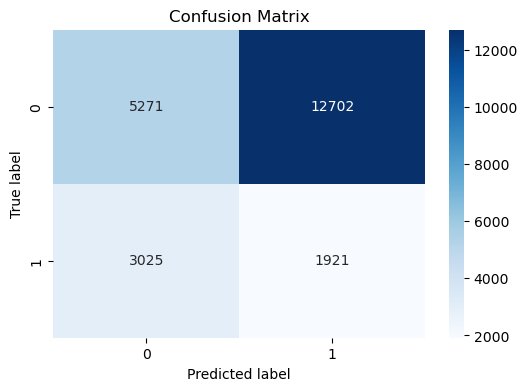

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.preprocessing import binarize
# Add any other imports you used for preprocessing (e.g., StandardScaler, MinMaxScaler)

d_test = pd.read_csv("train.csv")

######################
# Insert whatever you need to do to prep the data here.
#######################

# ***CRITICAL: Define your model training columns here.***
# Replace this list with the exact list of columns that went into training your 'model'.
# Example: MODEL_TRAINING_COLUMNS = ['person_age', 'person_income_scaled', 'loan_intent_PERSONAL_scaled', ...]
MODEL_TRAINING_COLUMNS = [] # <- REPLACE WITH YOUR ACTUAL LIST

# 1. Target Column Fix (Derived from your notebook)
target_column = 'loan_status'

# 2. Handle missing values by dropping rows
d_test = d_test.dropna()

# 3. Feature Engineering
d_test["grade_2"] = d_test["loan_grade"].isin(["A", "B", "C"])

# 4. Drop original column
d_test.drop(columns={"loan_grade"}, inplace=True)

# 5. Separate features (X) and target (y)
ytest = d_test[target_column]
xtest = d_test.drop(target_column, axis=1)

# 6. --- INSERT REMAINING PREPROCESSING HERE (One-Hot Encoding, Scaling) ---

# Example: One-Hot Encoding (MUST be applied before scaling)
xtest = pd.get_dummies(xtest, drop_first=True)

# Example: Scaling
# numeric_cols = [...] # Define your numeric columns
# xtest[numeric_cols] = YOUR_FITTED_SCALER.transform(xtest[numeric_cols])

# 7. ***CRITICAL: ALIGN COLUMNS***
# This step ensures 'xtest' has the exact same columns in the exact same order as the data 
# your model was trained on, filling in missing OHE columns with 0s.
if MODEL_TRAINING_COLUMNS:
    xtest = xtest.reindex(columns=MODEL_TRAINING_COLUMNS, fill_value=0)
    
# Convert ytest to a numpy array for consistency with sklearn metrics
ytest = ytest.values

# 8. Generate predictions (requires 'model' to be defined and trained)
prediction_probabilities = model.predict_proba(xtest)[:, 1]

# Convert probabilities to class labels (0 or 1)
prediction_labels = binarize(prediction_probabilities.reshape(-1, 1), threshold=0.5).ravel()

# This should work once you're done, as is.
print("--- Results ---")
print("F1:",f1_score(ytest, prediction_labels))
conf_matrix = confusion_matrix(ytest, prediction_labels)

# Display Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()